In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import os
os.chdir(r'C:\Users\dell\PycharmProjects\MachineLearning\Pandas\datasets')

# Categorical variables

## One Hot Encoding

In [3]:
df = pd.read_csv('tips.csv')
df.head(10)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.00,Male,No,Sun,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


In [6]:
OneHotEncoding = pd.get_dummies(df[['sex', 'smoker', 'day', 'time']])
#Equivalent: pd.get_dummies(df, columns = ['sex', 'smoker', 'day', 'time'])
OneHotEncoding.head(10)

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1,0,1,0,0,0,1,0,1,0
1,0,1,1,0,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,1,0,0,0,1,0,1,0
4,1,0,1,0,0,0,1,0,1,0
5,0,1,1,0,0,0,1,0,1,0
6,0,1,1,0,0,0,1,0,1,0
7,0,1,1,0,0,0,1,0,1,0
8,0,1,1,0,0,0,1,0,1,0
9,0,1,1,0,0,0,1,0,1,0


# Binning and Discretization

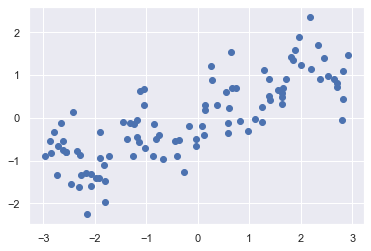

In [12]:
from mglearn.datasets import make_wave
X, y = make_wave(100)
plt.scatter(X[:,0], y)


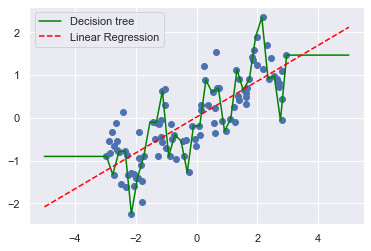

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model1 = LinearRegression()
model1.fit(X, y)
model2 = DecisionTreeRegressor()
model2.fit(X, y)

lines = np.linspace(-5, 5)
plt.scatter(X[:,0], y)
plt.plot(lines, model2.predict(lines[:,None]), label = 'Decision tree', color = 'green')
plt.plot(lines, model1.predict(lines[:, None]), label = 'Linear Regression', color = 'red', ls = '--')
plt.legend()

<p class = 'note'>Binning <code>X</code> into 11 bins</p>

In [21]:
bins = np.linspace(-3, 3, 11)
hist = np.digitize(X, bins)

<p class = 'note'>One hot encoding each bin:</p>

In [24]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(hist)
data = encoder.transform(hist)
data

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [36]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
#fit each model to the binning data
model1.fit(data, y)
model2.fit(data, y)



DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

# Interaction and Polynomials

<p class = 'note'><i>Interaction</i>: adding new features</p> 

<p class = 'note'>Polynomials</p>

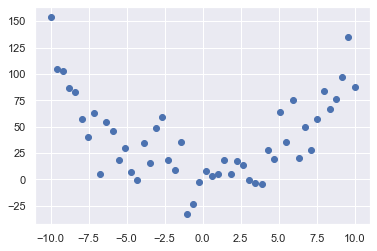

In [40]:
X = np.linspace(-10, 10)
np.random.seed(101)
y = X ** 2 + 20 * np.random.randn(len(X))
plt.scatter(X, y)

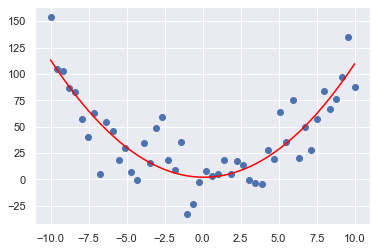

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
model.fit(X[:,None], y)
plt.scatter(X, y)
plt.plot(X, model.predict(X[:,None]), color = 'red')

# Univariate Nonlinear Transformation

<p class = 'note'>Using functions like <code>exp</code>, <code>log</code>, <code>sin</code>,... to transform univariate data</p>

# Conclusion

As you saw in the previous examples, binning, polynomials, and interactions can
have a huge influence on how models perform on a given dataset. This is particularly
true for less complex models like linear models and naive Bayes models. Tree-based
models, on the other hand, are often able to discover important interactions them‐
selves, and don’t require transforming the data explicitly most of the time. Other
models, like SVMs, nearest neighbors, and neural networks, might sometimes benefit
from using binning, interactions, or polynomials, but the implications there are usu‐
ally much less clear than in the case of linear models.